In [1]:
import pandas as pd
pd.__version__

'0.25.1'

In [2]:
s = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv')

/Users/austinmccarson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
s = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2016.csv',
               converters={'Total Charges':lambda x:float(x.replace(',',''))})

In [4]:
len(s)

2343429

In [5]:
s.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [6]:
s['Total Charges'].sum()

107807177917.20009

In [7]:
nypop = 19.54e6

In [8]:
s['Total Charges'].sum()

107807177917.20009

In [9]:
import numpy as np
#np.array(['hi',' ','there!'],dtype=str).sum()

In [10]:
c = s['Total Charges']

In [11]:
c.min()

0.01

In [12]:
c.max()

10477499.5

In [13]:
s.loc[ c.idxmax() ]

Health Service Area                                                        New York City
Hospital County                                                                Manhattan
Operating Certificate Number                                                 7.00205e+06
Facility Id                                                                         1463
Facility Name                                                       NYU Hospitals Center
Age Group                                                                        0 to 17
Zip Code - 3 digits                                                                  100
Gender                                                                                 M
Race                                                                          Other Race
Ethnicity                                                              Not Span/Hispanic
Length of Stay                                                                     120 +
Type of Admission    

In [14]:
c.mean()

46004.0299566149

In [15]:
c.median()

24889.0

# Make Our Own Histograms

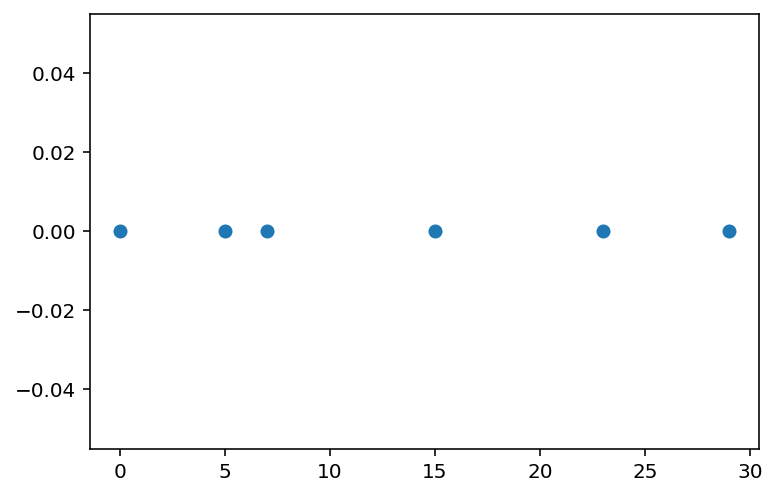

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.array([0,23,15,5,7,29])

plt.plot(x,0*x,'o');

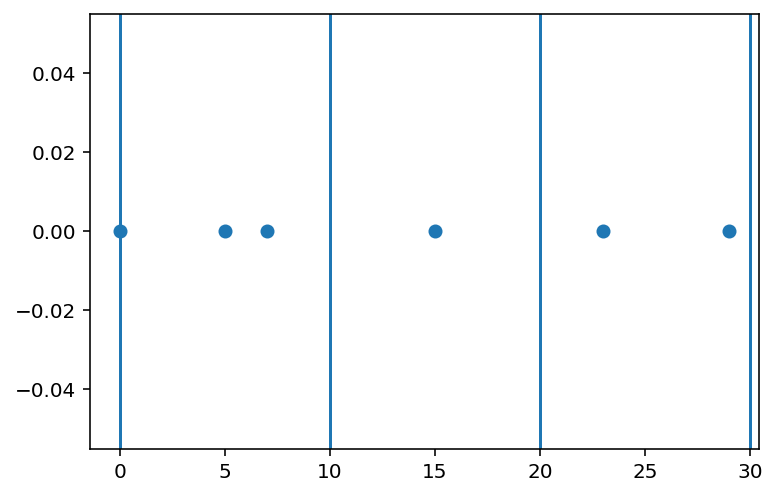

In [18]:
plt.plot(x,0*x,'o')
[plt.axvline(x) for x in [0,10,20,30]]

In [19]:
(x/10).astype(int)

array([0, 2, 1, 0, 0, 2])

In [20]:
x//10

array([0, 2, 1, 0, 0, 2])

In [22]:
xmin = 0
binwidth = 10
((x-xmin)/binwidth).astype(int)

array([0, 2, 1, 0, 0, 2])

In [23]:
nbins = 3
bincounts = np.zeros(nbins, dtype=int)
binlocations = ((x-xmin)/binwidth).astype(int)
binlocations
np.add.at( bincounts, binlocations, 1 )
bincounts

array([3, 1, 2])

In [26]:
bincenters = np.linspace(xmin, xmin+binwidth*nbins, nbins, endpoint=False) + binwidth/2
bincenters

array([ 5., 15., 25.])

<BarContainer object of 3 artists>

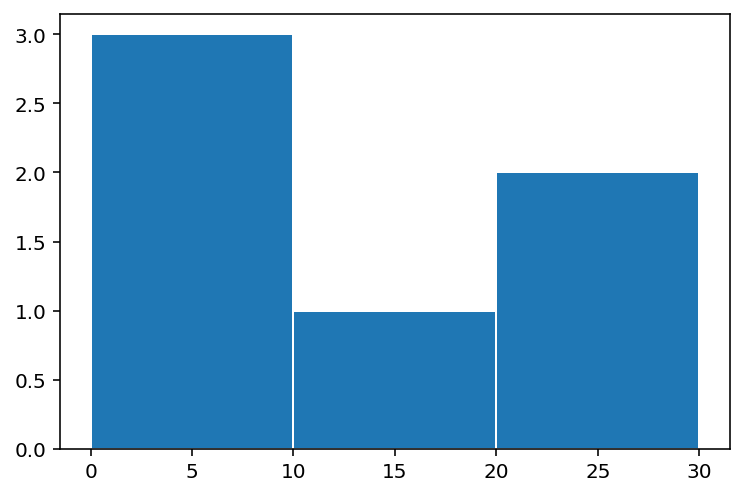

In [27]:
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

In [36]:
from histogram import histogram

<BarContainer object of 3 artists>

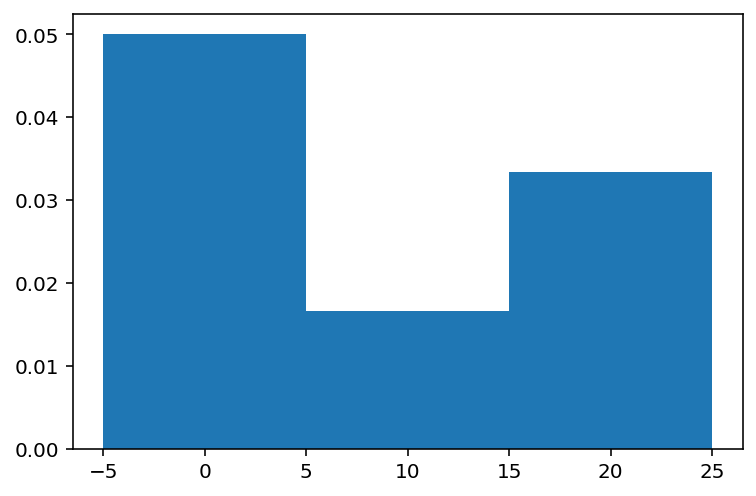

In [37]:
bincenters, bincounts = histogram( x, 0, 30, 3, rawcounts=False )
plt.bar( bincenters, bincounts, binwidth )

<BarContainer object of 3 artists>

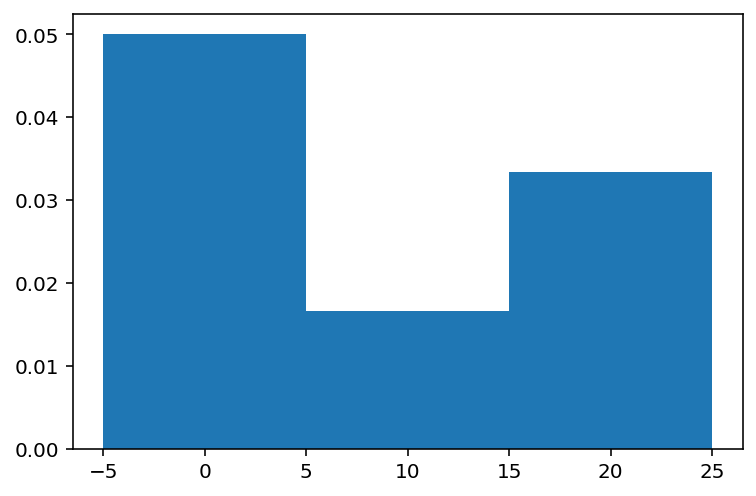

In [39]:
bincenters, bincounts = histogram( x, 0, 30, 3, rawcounts=False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth )

<BarContainer object of 10 artists>

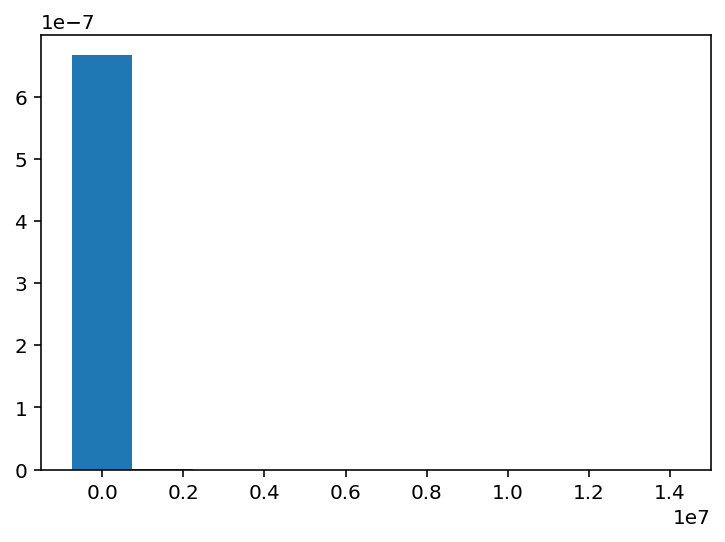

In [40]:
bincenters, bincounts = histogram( c, 0, 1.5e7, rawcounts=False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth )

<BarContainer object of 20 artists>

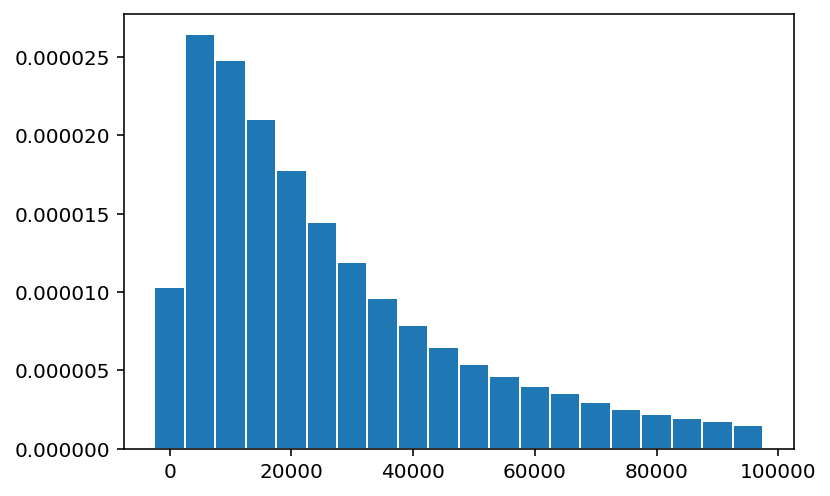

In [43]:
bincenters, bincounts = histogram( c, 0, 1e5, 20, rawcounts = False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor = 'w' )

<BarContainer object of 100 artists>

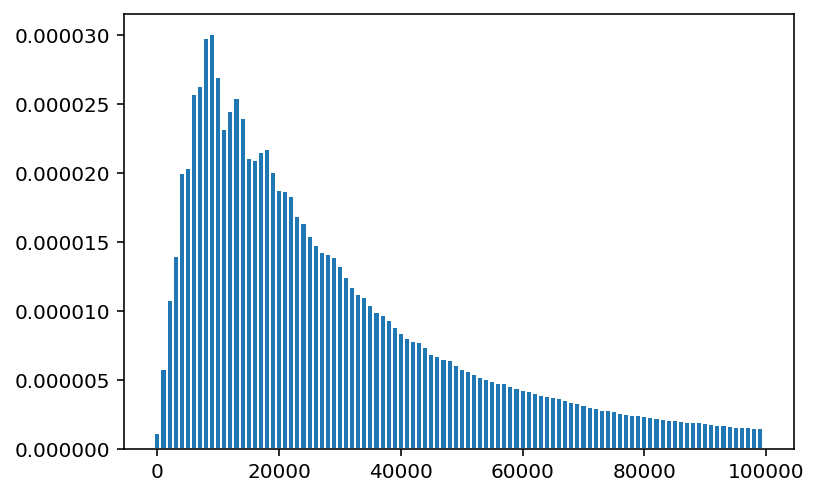

In [44]:
bincenters, bincounts = histogram( c, 0, 1e5, 100, rawcounts=False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

<BarContainer object of 2 artists>

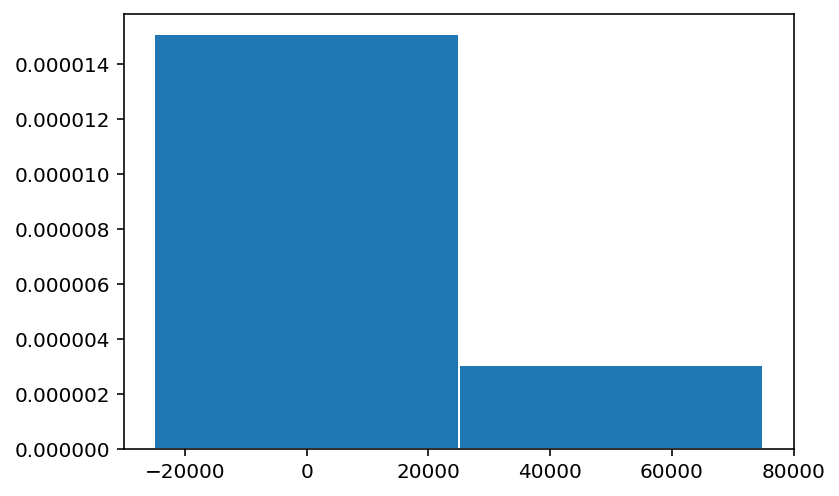

In [46]:
bincenters, bincounts = histogram( c, 0, 1e5, 2, rawcounts=False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

Expect fluctuations of size relative to mean

<BarContainer object of 10 artists>

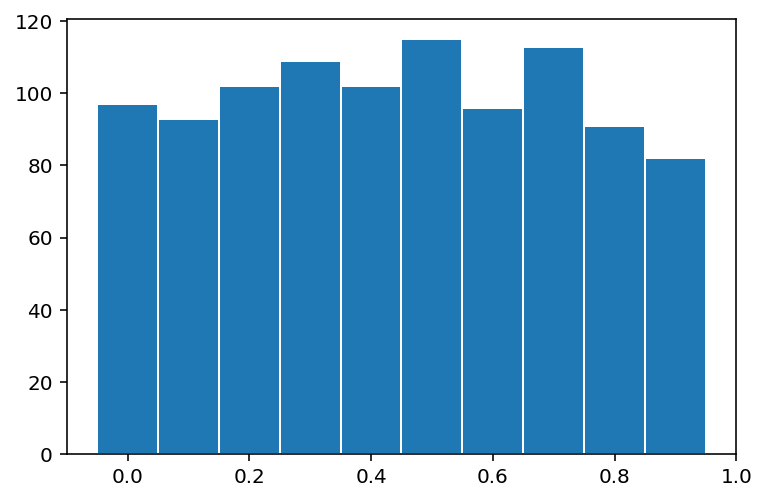

In [47]:
N = 1000
nbins = 10
u = np.random.rand(N)
bincenters, bincounts = histogram( u, 0, 1, nbins, rawcounts = True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w')

<BarContainer object of 10 artists>

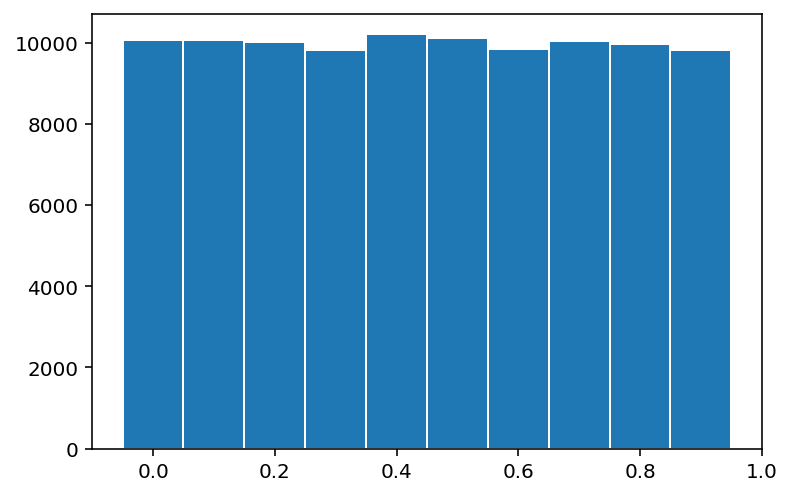

In [48]:
N = 100000
nbins = 10
u = np.random.rand(N)
bincenters, bincounts = histogram( u, 0, 1, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w')

An underlying distribution that does actually vary (slowly): exponential

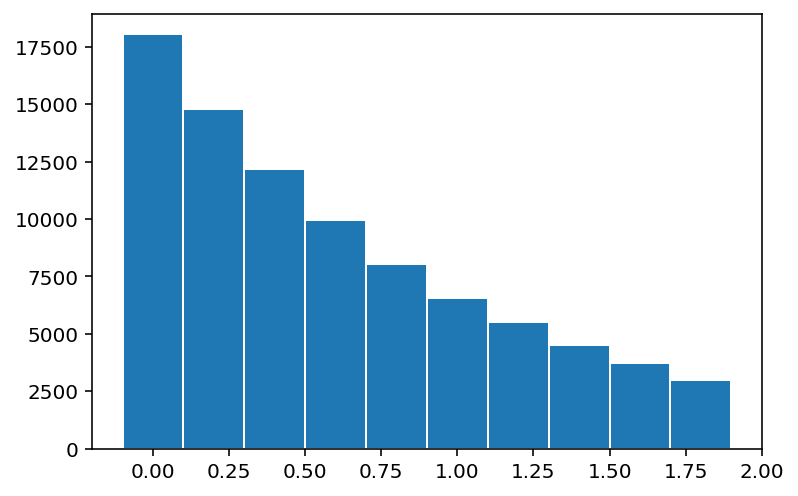

In [49]:
N = 100000
nbins = 10
u = np.random.rand(N)
bincenters,bincounts = histogram( -np.log(u), 0, 2, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' ) ;

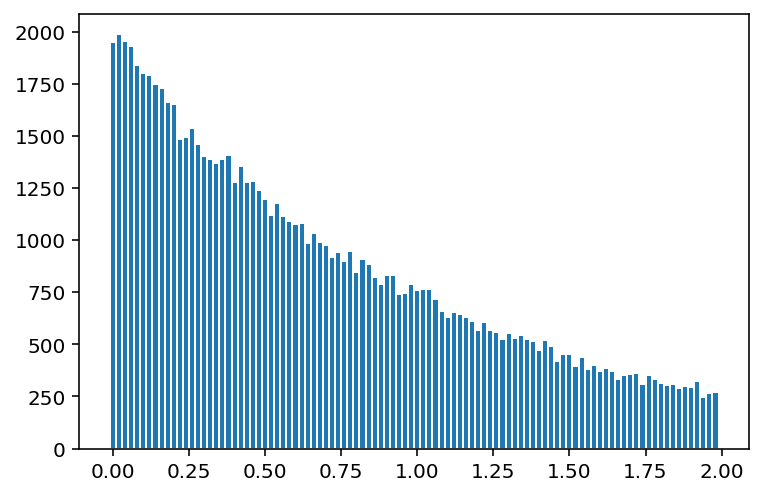

In [51]:
nbins = 100
u = np.random.rand(N)
bincenters,bincounts = histogram( -np.log(u), 0, 2, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' ) ;

The fine-scale structure we see above is just random noise

# In contrast, here is a case where the underlying distribution has true very-fine-scale structure:

In [53]:
dd = 'CCS Diagnosis Description'
fn = 'Facility Name'
mmc = s[ (s[dd]=='Liveborn') & (s[fn]=='Maimonides Medical Center')]

<BarContainer object of 100 artists>

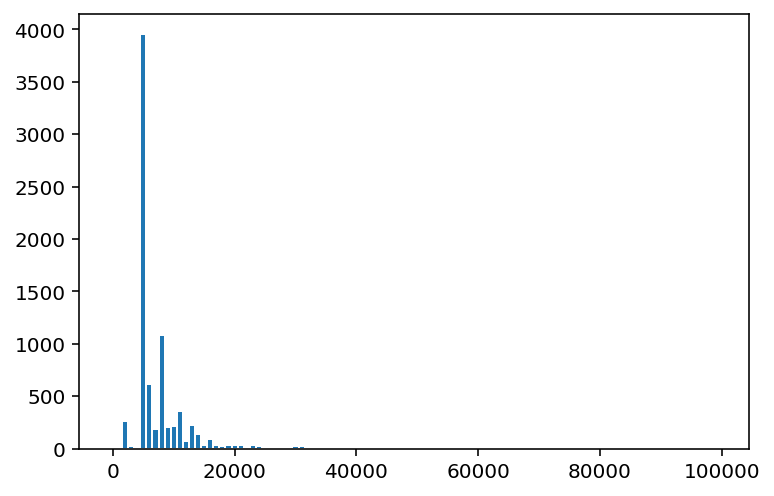

In [54]:
nbins = 100
u = np.random.rand(N)
bincenters, bincounts = histogram( mmc['Total Charges'], 0, 1e5, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

<BarContainer object of 500 artists>

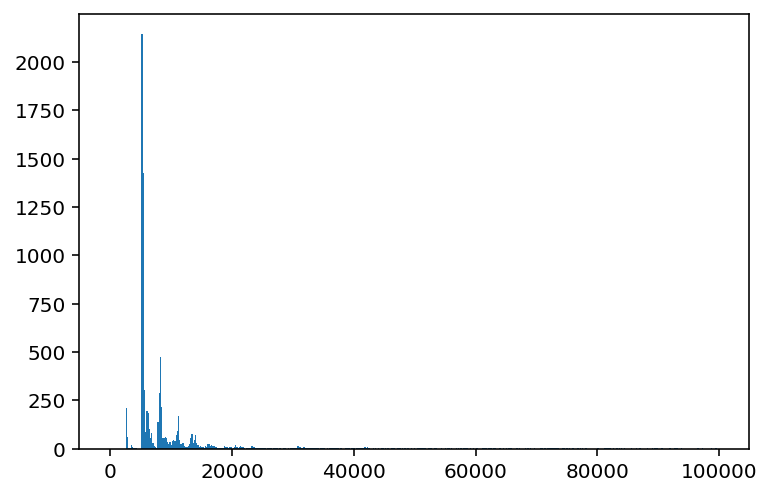

In [55]:
nbins = 500
u = np.random.rand(N)
bincenters, bincounts = histogram( mmc['Total Charges'], 0, 1e5, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth )

<BarContainer object of 500 artists>

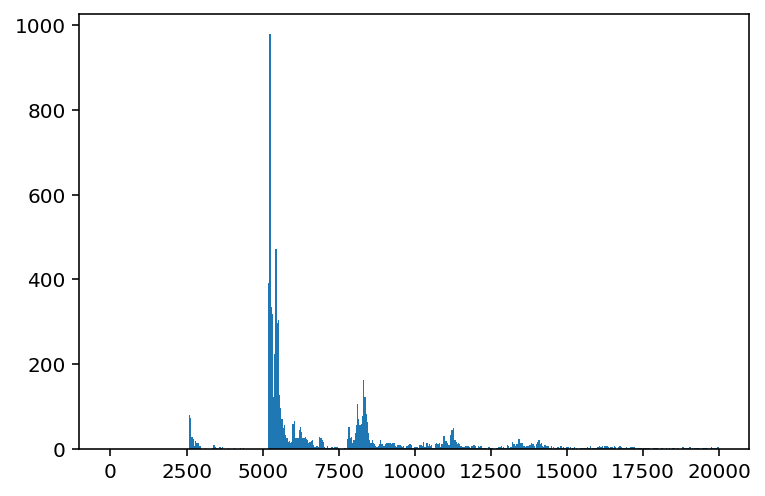

In [57]:
nbins = 500
u = np.random.rand(N)
bincenters, bincounts = histogram( mmc['Total Charges'], 0, 2e4, nbins, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth )

# Back to all the charges

Consider instead the distribution of the logarithms of the charges:

<BarContainer object of 100 artists>

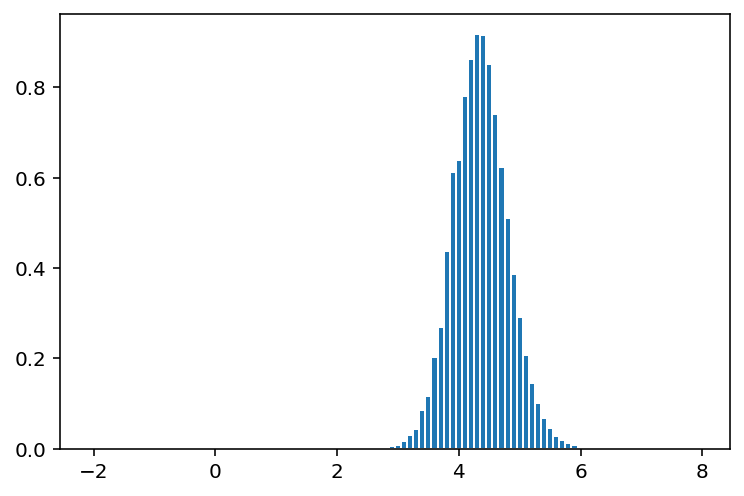

In [58]:
logc = np.log10(c)
bincenters, bincounts = histogram( logc, -2, 8, 100, rawcounts=False)
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

Zoom in a bit:

<BarContainer object of 50 artists>

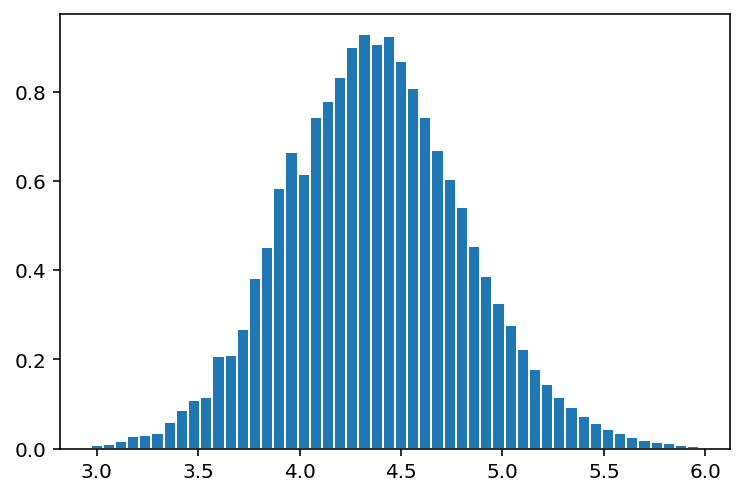

In [60]:
logc = np.log10(c)
bincenters, bincounts = histogram( logc, 3, 6, 50, rawcounts=False )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )

Compare with normal distribution:

In [61]:
def normal(x,mu,sigma): 
    return (1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2/sigma**2))

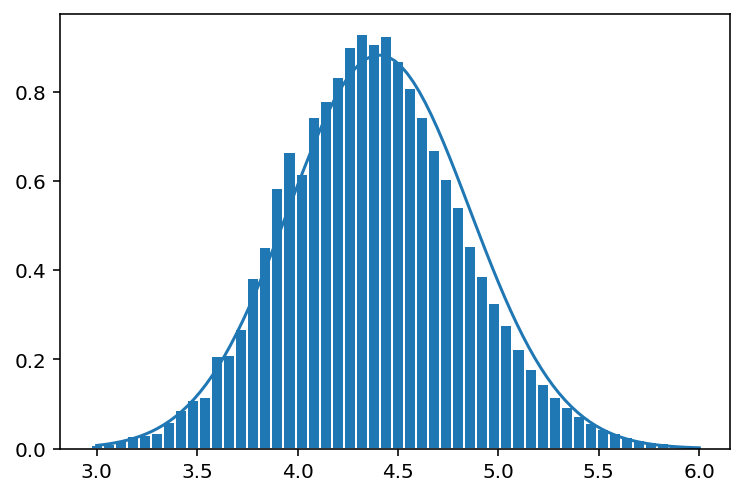

In [64]:
x = np.linspace(3,6,100)
y = normal( x, logc.mean(), logc.std() )
plt.bar( bincenters, bincounts, binwidth, edgecolor='w' )
plt.plot(x,y)

In [68]:
dd = 'CCS Diagnosis Description'
b = s[ (s[dd]=='Liveborn') ]

<BarContainer object of 49 artists>

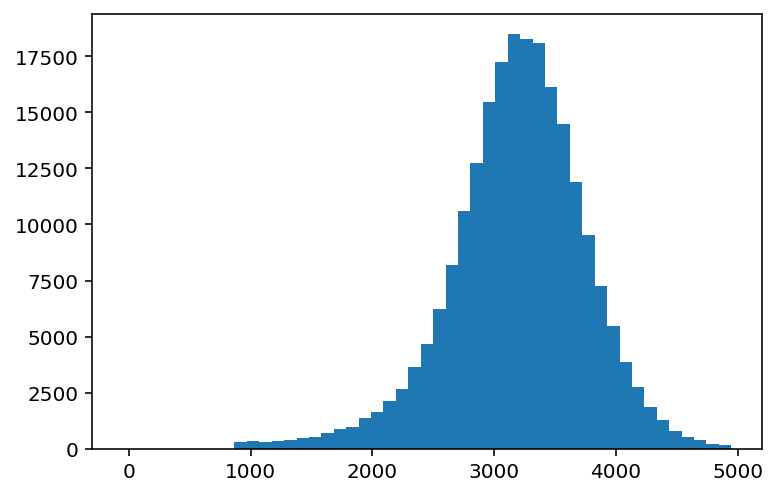

In [75]:
bincenters, bincounts = histogram( b['Birth Weight'], 0,5000, 49, rawcounts=True )
binwidth = bincenters[1] - bincenters[0]
plt.bar( bincenters, bincounts, binwidth )

In [78]:
b['Birth Weight'].value_counts()

3200    18479
3300    18291
3400    18084
3100    17243
3500    16141
        ...  
6300       19
8200       18
5900       16
9900       16
6900       15
Name: Birth Weight, Length: 90, dtype: int64

In [99]:
df = pd.DataFrame([['fruit','apple',24],
                  ['fruit','orange',67],
                  ['fruit','banana',113],
                  ['veg','broccoli',5],
                  ['veg','carrot',15]], columns=['kind','name','number sold'])

display(df)

,kind,name,number sold
0,fruit,apple,24
1,fruit,orange,67
2,fruit,banana,113
3,veg,broccoli,5
4,veg,carrot,15


In [100]:
g = df.groupby('kind')

In [101]:
for item in g:
    print(type(item))

<class 'tuple'>
<class 'tuple'>


In [102]:
for item in g:
    print(len(item))

2
2


In [107]:
for x,y in g:
    print(x)
    display(y)

fruit


,kind,name,number sold
0,fruit,apple,24
1,fruit,orange,67
2,fruit,banana,113


veg


,kind,name,number sold
3,veg,broccoli,5
4,veg,carrot,15


In [104]:
g.agg({'number sold': 'median' })

,number sold
kind,
fruit,67
veg,10


In [105]:
g.agg({ 'number sold': 'median' }).rename(columns={'number sold':'median number sold'})

,median number sold
kind,
fruit,67
veg,10


In [106]:
g.agg({ 'number sold': 'median' }).rename(columns={'number sold':'median number sold'}).reset_index()

,kind,median number sold
0,fruit,67
1,veg,10


Use the above methods (groupby and agg) to find the most common diagnoses

In [108]:
s.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [117]:
admissions = {}
for x in s['CCS Diagnosis Description']:
    if x not in admissions:
        admissions[x] = 0
    else: admissions[x] = admissions[x]+1

In [123]:
s.groupby(dd).agg({dd:'count'}).rename(columns={dd:'count'}).sort_values('count',ascending=False).head()

,count
CCS Diagnosis Description,
Liveborn,224615
Septicemia (except in labor),111075
Osteoarthritis,67235
Mood disorders,54227
Alcohol-related disorders,50459


In [133]:
(s[s[dd].str.contains('ancer')]
.groupby(dd)
.agg({dd:'count'})
.rename(columns={dd:'count'})
.sort_values('count', ascending=False)
.head()
.reset_index()
)

,CCS Diagnosis Description,count
0,Cancer of bronchus; lung,9388
1,Cancer of colon,5995
2,Cancer of breast,5238
3,Cancer of prostate,4500
4,Cancer of kidney and renal pelvis,3368


In [134]:
cc = (s[s[dd].str.contains('ancer')]
.groupby(dd)
.agg({dd:'count'})
.rename(columns={dd:'count'})
.sort_values('count', ascending=False)
.reset_index()
)

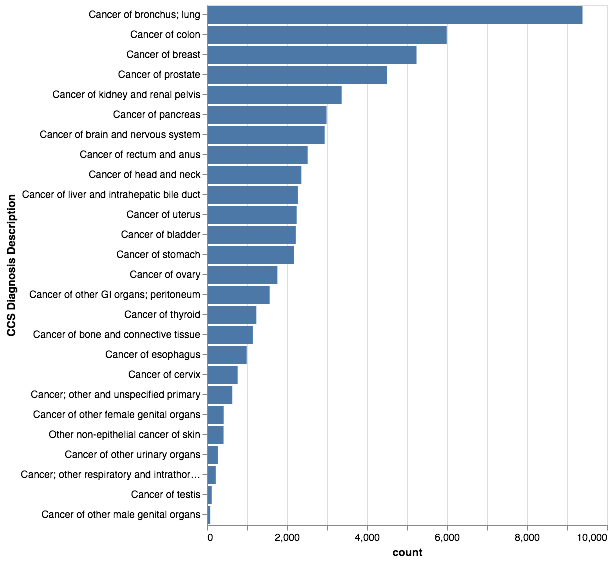

In [136]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(cc).mark_bar().encode(x='count',y=alt.Y(dd,sort=None))

In [223]:
dc = 'CCS Diagnosis Code'
s[dc].value_counts()

218    224615
2      111075
203     67235
657     54227
660     50459
        ...  
206        26
86         24
176        13
174        11
663         3
Name: CCS Diagnosis Code, Length: 264, dtype: int64

In [224]:
dd = 'CCS Diagnosis Description'
sc = s[ (s[dd].str.contains('ancer')) | (s[dd].str.contains('elanoma')) | (s[dd].str.contains('ymphoma'))]

In [225]:
cc = ( sc
     .groupby((dd,'Age Group'))
     .agg({dd:'count'})
     .rename(columns={dd:'count'})
     .reset_index()
     )

/Users/austinmccarson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


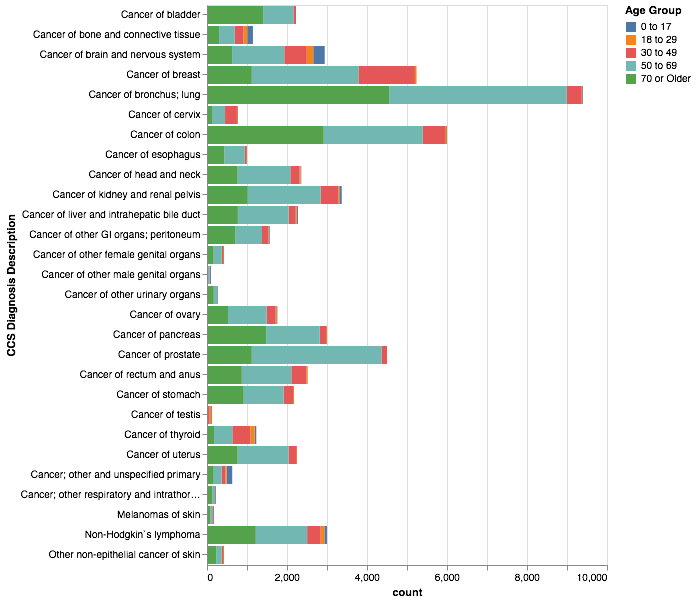

In [226]:
alt.Chart(cc).mark_bar().encode(x='count',y=alt.Y(dd,sort=None),color='Age Group')

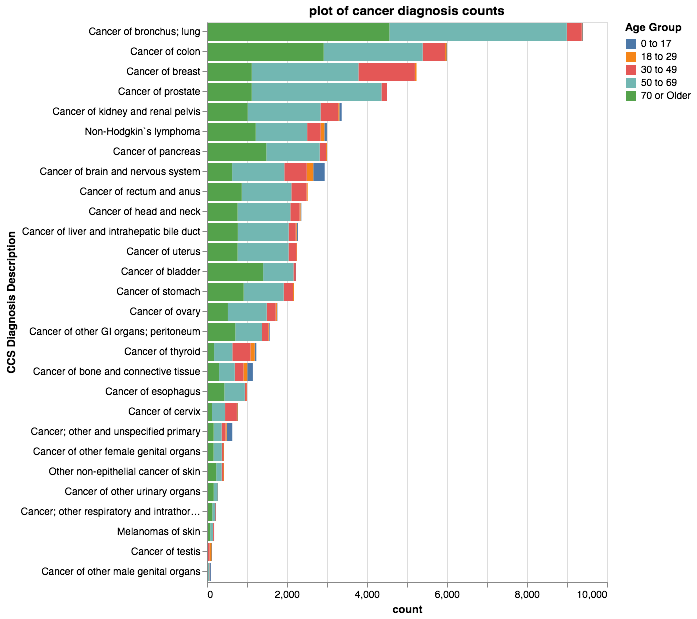

In [227]:
import altair as alt
alt.renderers.enable('notebook')
(alt.Chart(cc,title='plot of cancer diagnosis counts')
.mark_bar()
.encode( y=alt.Y('CCS Diagnosis Description',
                sort=alt.EncodingSortField(field = 'count', op = 'sum', order = 'descending')),
       x='count',
       color='Age Group')
)

# Joining Tables

In [232]:
fn = pd.read_csv('firstname.csv')
ln = pd.read_csv('lastname.csv')
t = pd.read_csv('teaching.csv',sep='\t')

In [155]:
fn

,person number,first name
0,199,Bernard
1,216,Betsy
2,265,Darsh
3,102,Dmitri
4,42,Dorien
5,150,Eyob
6,200,John
7,293,Kevin
8,100,Li
9,214,Palak


In [156]:
ln

,person number,last name
0,19,Badzioch
1,293,Bui
2,201,Cassani
3,215,Gao
4,102,Kireyev
5,270,Knowles
6,100,Li
7,216,McCall
8,265,Nathawani
9,214,Patel


In [228]:
pd.merge(fn,ln,on='person number')

,person number,first name,last name
0,216,Betsy,McCall
1,265,Darsh,Nathawani
2,102,Dmitri,Kireyev
3,42,Dorien,Verbruggen
4,150,Eyob,Tadele-Manhardt
5,200,John,Ringland
6,293,Kevin,Bui
7,100,Li,Li
8,214,Palak,Patel
9,201,Simone,Cassani


In [229]:
pd.merge(fn,ln,on='person number', how='left').fillna('')

,person number,first name,last name
0,199,Bernard,
1,216,Betsy,McCall
2,265,Darsh,Nathawani
3,102,Dmitri,Kireyev
4,42,Dorien,Verbruggen
5,150,Eyob,Tadele-Manhardt
6,200,John,Ringland
7,293,Kevin,Bui
8,100,Li,Li
9,214,Palak,Patel


In [230]:
pd.merge(fn,ln,on='person number', how='right').fillna('')

,person number,first name,last name
0,216,Betsy,McCall
1,265,Darsh,Nathawani
2,102,Dmitri,Kireyev
3,42,Dorien,Verbruggen
4,150,Eyob,Tadele-Manhardt
5,200,John,Ringland
6,293,Kevin,Bui
7,100,Li,Li
8,214,Palak,Patel
9,201,Simone,Cassani


In [231]:
pd.merge(fn,ln,on='person number', how='outer').fillna('')

,person number,first name,last name
0,199,Bernard,
1,216,Betsy,McCall
2,265,Darsh,Nathawani
3,102,Dmitri,Kireyev
4,42,Dorien,Verbruggen
5,150,Eyob,Tadele-Manhardt
6,200,John,Ringland
7,293,Kevin,Bui
8,100,Li,Li
9,214,Palak,Patel


In [233]:
t

,TERMSOURCEKEY,TERM,CATALOGNUMBERSOURCEKEY,CLASSSECTION,FACULTYSOURCEKEY,COURSESOURCEKEY,COURSETYPESOURCEKEY,COURSEDESCRIPTION,ENROLLTOTAL,SECTIONCOUNT,SECTIONCAPACITY,ROOMCAPACITY,ROOM,CLASSMEETINGPATTERNSOURCEKEY,CLASSSTARTTIME,CLASSENDTIME,CAMPUS,ACADEMICORG
0,2199,Fall 2019,800TUT,BAD,199,12214,TUT,Thesis Guidance,1,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
1,2199,Fall 2019,801TUT,BAD,199,12215,TUT,Reading and Conference,1,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
2,2199,Fall 2019,499TUT,RIN,200,16749,TUT,Independent Study,2,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
3,2199,Fall 2019,563LEC,GX,200,19148,LEC,Topics in Applied Math,12,1,9,56,Math 250,MW,2:00PM,3:50PM,North Campus,Mathematics
4,2199,Fall 2019,448LR,0,200,301203,LEC,Data-Oriented Computing,19,1,20,56,Math 250,MW,2:00PM,3:50PM,North Campus,Mathematics
5,2199,Fall 2019,337LR,0,201,16125,LEC,Scientific and Math Comp,30,1,30,56,Math 250,TR,12:30PM,2:20PM,North Campus,Mathematics
6,2199,Fall 2019,337LR,R,201,16125,REC,Scientific and Math Comp,30,1,30,0,Math Arr,ARR,12:00AM,12:00AM,North Campus,Mathematics
7,2199,Fall 2019,142LR,T,201,11295,LEC,College Calculus 2,60,1,60,71,Knox 04,TR,9:30AM,10:50AM,North Campus,Mathematics
8,2199,Fall 2019,309LR,T,199,14256,LEC,Intro Linear Algebra,90,1,90,97,Nsc 205,TR,9:30AM,10:50AM,North Campus,Mathematics


In [234]:
pd.merge(fn,t,left_on='person number', right_on='FACULTYSOURCEKEY',how='left').fillna('')

,person number,first name,TERMSOURCEKEY,TERM,CATALOGNUMBERSOURCEKEY,CLASSSECTION,FACULTYSOURCEKEY,COURSESOURCEKEY,COURSETYPESOURCEKEY,COURSEDESCRIPTION,ENROLLTOTAL,SECTIONCOUNT,SECTIONCAPACITY,ROOMCAPACITY,ROOM,CLASSMEETINGPATTERNSOURCEKEY,CLASSSTARTTIME,CLASSENDTIME,CAMPUS,ACADEMICORG
0,199,Bernard,2199,Fall 2019,800TUT,BAD,199,12214,TUT,Thesis Guidance,1,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
1,199,Bernard,2199,Fall 2019,801TUT,BAD,199,12215,TUT,Reading and Conference,1,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
2,199,Bernard,2199,Fall 2019,309LR,T,199,14256,LEC,Intro Linear Algebra,90,1,90,97,Nsc 205,TR,9:30AM,10:50AM,North Campus,Mathematics
3,216,Betsy,,,,,,,,,,,,,,,,,,
4,265,Darsh,,,,,,,,,,,,,,,,,,
5,102,Dmitri,,,,,,,,,,,,,,,,,,
6,42,Dorien,,,,,,,,,,,,,,,,,,
7,150,Eyob,,,,,,,,,,,,,,,,,,
8,200,John,2199,Fall 2019,499TUT,RIN,200,16749,TUT,Independent Study,2,1,999,0,Arr Arr,ARR,12:00AM,12:00AM,Arranged,Mathematics
9,200,John,2199,Fall 2019,563LEC,GX,200,19148,LEC,Topics in Applied Math,12,1,9,56,Math 250,MW,2:00PM,3:50PM,North Campus,Mathematics


In [198]:
col = t.columns[0].split('\t')
for x in range(len(col)):
    col[x] = col[x].replace('\"','')

In [222]:
for i in range(9):
    print(t.loc[i, :])

TERMSOURCEKEY\t"TERM"\t"CATALOGNUMBERSOURCEKEY"\t"CLASSSECTION"\t"FACULTYSOURCEKEY"\t"COURSESOURCEKEY"\t"COURSETYPESOURCEKEY"\t"COURSEDESCRIPTION"\t"ENROLLTOTAL"\t"SECTIONCOUNT"\t"SECTIONCAPACITY"\t"ROOMCAPACITY"\t"ROOM"\t"CLASSMEETINGPATTERNSOURCEKEY"\t"CLASSSTARTTIME"\t"CLASSENDTIME"\t"CAMPUS"\t"ACADEMICORG"    2199\t"Fall 2019"\t"800TUT"\t"BAD"\t199\t12214...
Name: 0, dtype: object
TERMSOURCEKEY\t"TERM"\t"CATALOGNUMBERSOURCEKEY"\t"CLASSSECTION"\t"FACULTYSOURCEKEY"\t"COURSESOURCEKEY"\t"COURSETYPESOURCEKEY"\t"COURSEDESCRIPTION"\t"ENROLLTOTAL"\t"SECTIONCOUNT"\t"SECTIONCAPACITY"\t"ROOMCAPACITY"\t"ROOM"\t"CLASSMEETINGPATTERNSOURCEKEY"\t"CLASSSTARTTIME"\t"CLASSENDTIME"\t"CAMPUS"\t"ACADEMICORG"    2199\t"Fall 2019"\t"801TUT"\t"BAD"\t199\t12215...
Name: 1, dtype: object
TERMSOURCEKEY\t"TERM"\t"CATALOGNUMBERSOURCEKEY"\t"CLASSSECTION"\t"FACULTYSOURCEKEY"\t"COURSESOURCEKEY"\t"COURSETYPESOURCEKEY"\t"COURSEDESCRIPTION"\t"ENROLLTOTAL"\t"SECTIONCOUNT"\t"SECTIONCAPACITY"\t"ROOMCAPACITY"\t"ROOM"\t"C

In [218]:
t

,"TERMSOURCEKEY\t""TERM""\t""CATALOGNUMBERSOURCEKEY""\t""CLASSSECTION""\t""FACULTYSOURCEKEY""\t""COURSESOURCEKEY""\t""COURSETYPESOURCEKEY""\t""COURSEDESCRIPTION""\t""ENROLLTOTAL""\t""SECTIONCOUNT""\t""SECTIONCAPACITY""\t""ROOMCAPACITY""\t""ROOM""\t""CLASSMEETINGPATTERNSOURCEKEY""\t""CLASSSTARTTIME""\t""CLASSENDTIME""\t""CAMPUS""\t""ACADEMICORG"""
0,"2199\t""Fall 2019""\t""800TUT""\t""BAD""\t199\t12214..."
1,"2199\t""Fall 2019""\t""801TUT""\t""BAD""\t199\t12215..."
2,"2199\t""Fall 2019""\t""499TUT""\t""RIN""\t200\t16749..."
3,"2199\t""Fall 2019""\t""563LEC""\t""GX""\t200\t19148\..."
4,"2199\t""Fall 2019""\t""448LR""\t0\t200\t301203\t""L..."
5,"2199\t""Fall 2019""\t""337LR""\t0\t201\t16125\t""LE..."
6,"2199\t""Fall 2019""\t""337LR""\t""R""\t201\t16125\t""..."
7,"2199\t""Fall 2019""\t""142LR""\t""T""\t201\t11295\t""..."
8,"2199\t""Fall 2019""\t""309LR""\t""T""\t199\t14256\t""..."


In [199]:
df = pd.DataFrame(t, columns=col)
df

,TERMSOURCEKEY,TERM,CATALOGNUMBERSOURCEKEY,CLASSSECTION,FACULTYSOURCEKEY,COURSESOURCEKEY,COURSETYPESOURCEKEY,COURSEDESCRIPTION,ENROLLTOTAL,SECTIONCOUNT,SECTIONCAPACITY,ROOMCAPACITY,ROOM,CLASSMEETINGPATTERNSOURCEKEY,CLASSSTARTTIME,CLASSENDTIME,CAMPUS,ACADEMICORG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
sheets = {
'f19_reviewer.xlsx':'1KJpIeML2f2t6UxxGFzOTOQPM0xtyUgJVVBrW3I9nyjU', # except change first Z to K
'f19_movie.xlsx'   :'1rrAUcQxNTGcwZTnUEI5kZJvDGjLE7V1LvB5Rey5rY1w', # except change first Z to r
'f19_rating.xlsx'  :'108q2iAlSiq8AQUJCOVa5uj8lkjIpBIPLIr83C41amYw'} # except change first Z to q

import requests
for sheet in sheets:
                 url = 'https://docs.google.com/spreadsheets/d/' + sheets[sheet] + '/export?format=xlsx'
                 r = requests.get(url)
                 with open(sheet,'wb') as f:
                         f.write(r.content)
                 print('Downloaded '+sheet)

Downloaded f19_reviewer.xlsx
Downloaded f19_movie.xlsx
Downloaded f19_rating.xlsx


In [181]:
movie = pd.read_excel('f19_movie.xlsx')
movie.head()

,movie_id,year,title,director
0,100.0,2014.0,Birdman,Alejandro G. Iñárritu
1,101.0,2004.0,The Incredibles,Brad Bird
2,102.0,2009.0,City Hall,Shin Woo-chul
3,103.0,1999.0,Topsy Turvy,Mike Leigh
4,104.0,2018.0,Avengers: EndGame,Anthony RUsso


In [182]:
movie['title'].value_counts()

Deadpool                        1
Invictus                        1
Mission Impossible - Fallout    1
Guardians of the Galaxy         1
The Thing                       1
                               ..
My people, my country           1
The Double Life of Veronique    1
Jarhead                         1
A beautiful mind                1
Never look away                 1
Name: title, Length: 112, dtype: int64